<a href="https://colab.research.google.com/github/CodeWithEugene/sample/blob/main/final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
# Loading the dataset
data = pd.read_csv('/content/finalproject_dataset_group6.csv')

In [ ]:
# Exploring the dataset
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Feature1  1000 non-null   float64
 1   Feature2  950 non-null    float64
 2   Feature3  950 non-null    float64
 3   Feature4  900 non-null    float64
dtypes: float64(4)
memory usage: 31.4 KB


,Feature1,Feature2,Feature3,Feature4
0,0.056896,9.074606,4.607973,11.895050
1,-2.092873,8.987265,5.168360,5.991266
2,-1.998360,9.110289,5.437010,7.851050
3,-0.231767,1.007090,8.009367,8.817900
4,-0.492928,6.674886,4.785915,9.554969


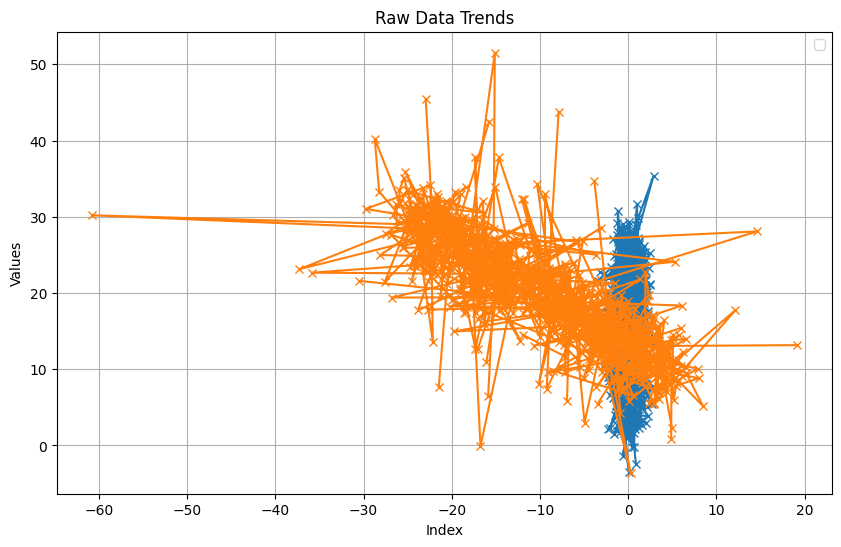

In [ ]:
# Visualizing raw data trends
plt.figure(figsize=(10, 6))
plt.plot(data['Feature1'], data['Feature2'], data['Feature3'], data['Feature4'], marker='x')
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Raw Data Trends')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
# Handling missing values
missing_values = data.isnull().sum()
print(missing_values)

Feature1      0
Feature2     50
Feature3     50
Feature4    100
dtype: int64


In [ ]:
# Filling missing values with the median
median_data_filling = data.fillna(data.median())

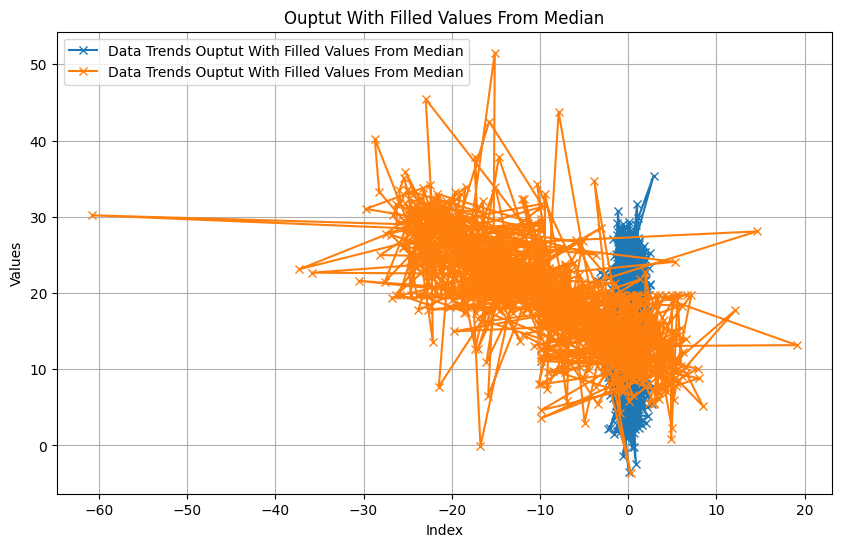

In [ ]:
# Visualizing data after handling missing values
plt.figure(figsize=(10, 6))
plt.plot(median_data_filling['Feature1'], median_data_filling['Feature2'], median_data_filling['Feature3'], median_data_filling['Feature4'], marker='x', label='Data Trends Ouptut With Filled Values From Median')
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Ouptut With Filled Values From Median')
plt.grid(True)
plt.legend()
plt.show()

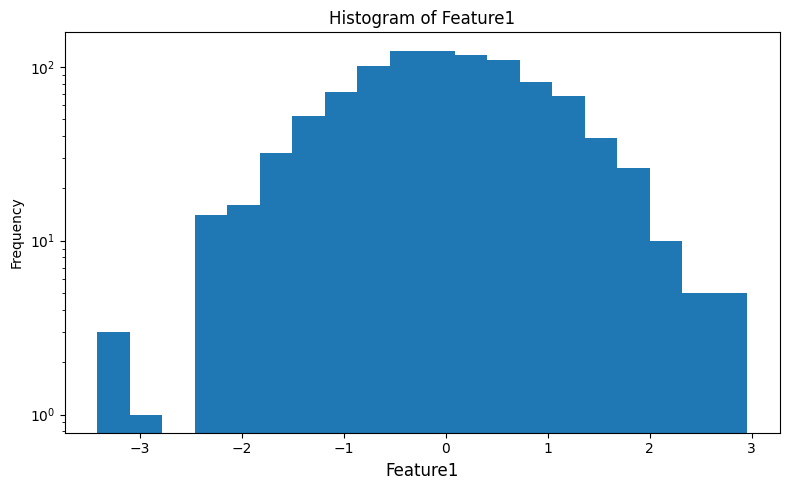

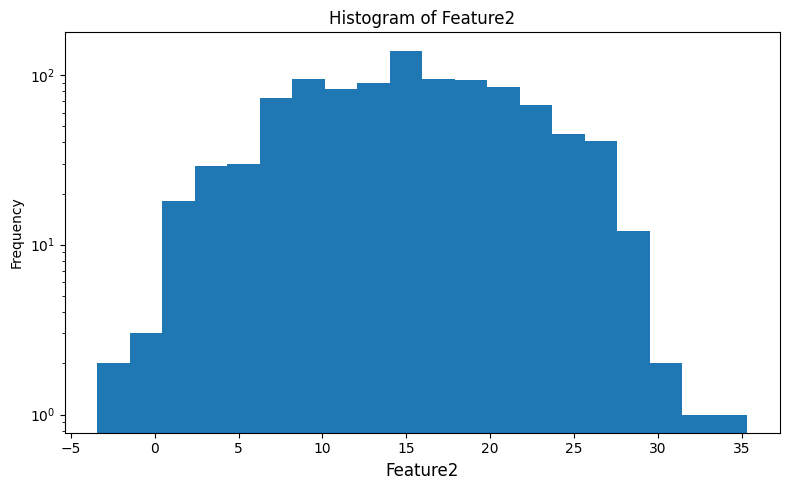

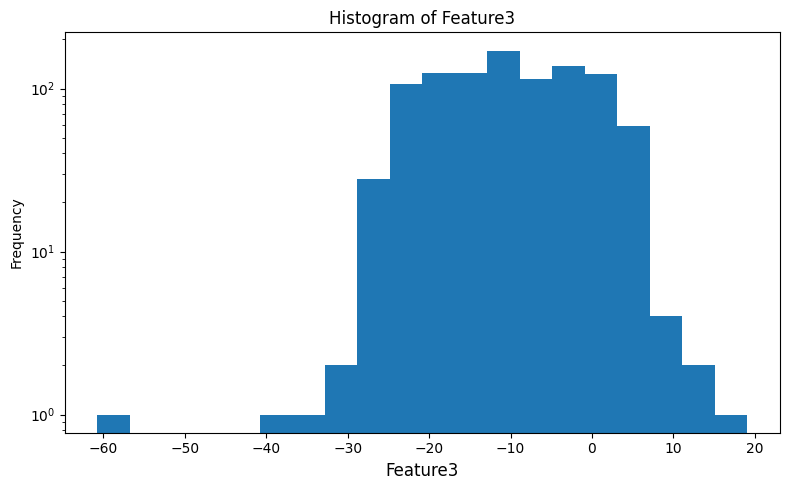

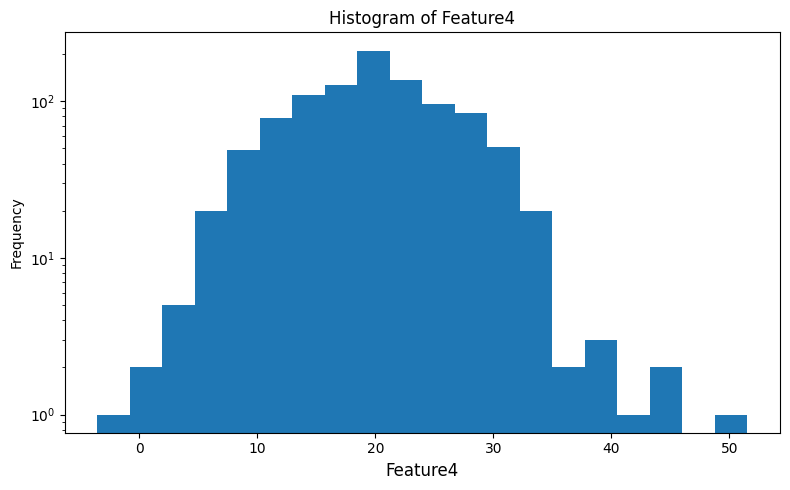

In [ ]:
# Identifying Outliers
for feature in ['Feature1', 'Feature2', 'Feature3', 'Feature4']:
    plt.figure(figsize=(8, 5))
    median_data_filling[feature].plot(kind='hist', bins=20, title=f'Histogram of {feature}', log=True)
    plt.xlabel(feature, fontsize=12)
    plt.tight_layout()
    plt.show()

In [ ]:
# Correlation analysis
correlation_matrix = median_data_filling.corr()
print(correlation_matrix)

          Feature1  Feature2  Feature3  Feature4
Feature1  1.000000  0.042709 -0.036045  0.065071
Feature2  0.042709  1.000000 -0.756635  0.679929
Feature3 -0.036045 -0.756635  1.000000 -0.706898
Feature4  0.065071  0.679929 -0.706898  1.000000


In [ ]:
# Defining variables for regression
X = median_data_filling[['Feature1', 'Feature2']] # The Two Independent variables I Chose
Y = median_data_filling['Feature4'] # The Dependent variable I chose

In [ ]:
# Splitting data into training and testing sets
from sklearn.model_selection import train_test_split # Importing necessary libraries
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
# Linear Regression model
from sklearn.linear_model import LinearRegression # Importing necessary libraries
regression_model = LinearRegression()
regression_model.fit(X_train, Y_train)

LinearRegression()

In [ ]:
# Predictions
# Generating predictions for both training and testing datasets using the trained regression model
test_predictions = regression_model.predict(X_test)  # Predictions for test data
train_predictions = regression_model.predict(X_train)  # Predictions for train data

In [ ]:
# Performance Metrics
from sklearn.metrics import mean_squared_error # Importing necessary libraries
from sklearn.metrics import r2_score # Importing necessary libraries
test_mean_squared_error = mean_squared_error(Y_test, test_predictions)  # MSE for test data
train_mean_squared_error = mean_squared_error(Y_train, train_predictions)  # MSE for train data
test_r_squared = r2_score(Y_test, test_predictions)  # R-squared for test data
train_r_squared = r2_score(Y_train, train_predictions)  # R-squared for train data

In [ ]:
# Residual Analysis
# Calculating residuals for training and testing datasets
train_residuals = Y_train - train_predictions  # Residuals for train data (Actual - Predicted)
test_residuals = Y_test - test_predictions  # Residuals for test data (Actual - Predicted)

In [ ]:
# Model Coefficients and Intercept
# Extracting the regression model's coefficients and intercept
regression_model_coefficients = regression_model.coef_  # Coefficients for the independent variables
regression_model_intercept = regression_model.intercept_  # Intercept of the regression line

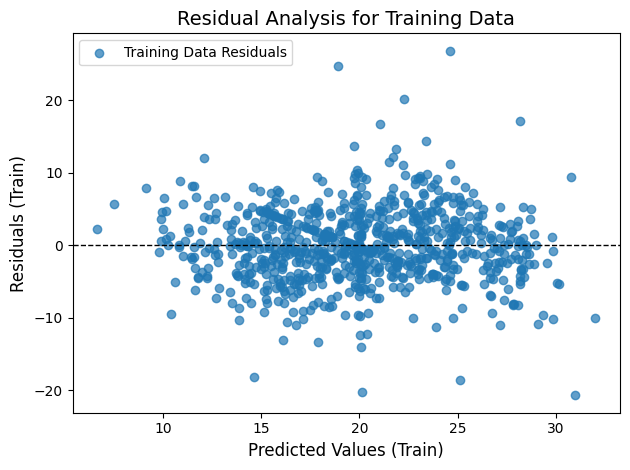

In [ ]:
# Plot Residuals for Training Data
import matplotlib.pyplot as plt # Importing necessary libraries
plt.scatter(train_predictions, train_residuals, alpha=0.7, label='Training Data Residuals')  # Residuals vs Predicted for training data
plt.axhline(y=0, color='black', linestyle='--', linewidth=1.0)  # Horizontal line at residual 0
plt.xlabel('Predicted Values (Train)')  # Label for x-axis
plt.ylabel('Residuals (Train)')  # Label for y-axis
plt.title('Residual Analysis for Training Data')  # Title of the plot
plt.legend()  # Adding legend
plt.tight_layout()  # Adjust layout to fit components
plt.show()  # Display the plot

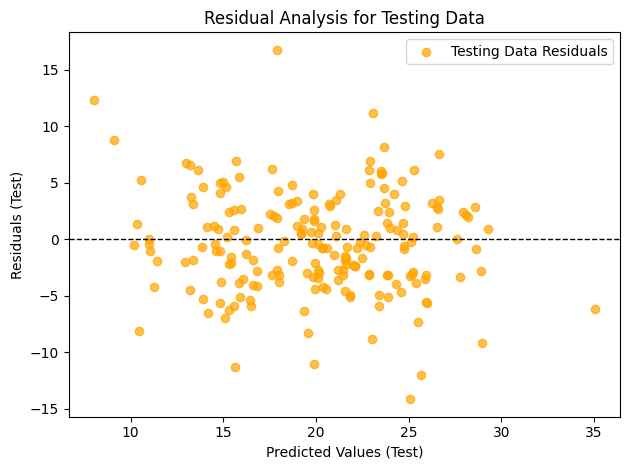

In [ ]:
# Plot Residuals for Testing Data
plt.scatter(test_predictions, test_residuals, alpha=0.7, label='Testing Data Residuals', color='orange')  # Residuals vs Predicted for testing data
plt.axhline(y=0, color='black', linestyle='--', linewidth=1.0)  # Horizontal line at residual 0
plt.xlabel('Predicted Values (Test)')  # Label for x-axis
plt.ylabel('Residuals (Test)')  # Label for y-axis
plt.title('Residual Analysis for Testing Data')  # Title of the plot
plt.legend()  # Adding legend
plt.tight_layout()  # Adjust layout to fit components
plt.show()  # Display the plot

In [ ]:
train_residuals.describe(), test_residuals.describe()

(count    8.000000e+02
 mean    -1.456613e-15
 std      5.080547e+00
 min     -2.072171e+01
 25%     -3.031595e+00
 50%     -2.014488e-01
 75%      3.211271e+00
 max      2.688834e+01
 Name: Feature4, dtype: float64,
 count    200.000000
 mean      -0.362667
 std        4.399068
 min      -14.153982
 25%       -3.175619
 50%       -0.526494
 75%        2.540311
 max       16.768449
 Name: Feature4, dtype: float64)

In [ ]:
median_data_filling.to_excel('/content/cleaned_dataset.xlsx', index=False) #Exportin the cleaned dataset to cleaned_dataset.xlsx

In [ ]:
import plotly.express as px

x = [1, 2, 3, 4, 5, 6, 7, 8, 9]  # x-axis
y = [9, 8, 7, 6, 5, 4, 3, 2, 1]  # y-axis

# Create a DataFrame
import pandas as pd
df = pd.DataFrame({'x': x, 'y': y})

fig = px.line(df, x='x', y='y', title='Title of the plot', labels={'x': 'This is x-axis', 'y': 'This is y-axis'}) # Create a line plot
fig.show() # Show the plot

In [ ]:
#The code below demonstrates my python script for calculating Body Mass Index (BMI) and determining the weight category of a person
#The code takes in the weight and height of a person and calculates the BMI
#The code then prints the BMI and the category weight of the person rounded to two decimal places(the categories are underweight, normal weight, overweight and obese)

# Get user input for weight and height
weight = float(input("Enter your weight in kilograms: "))
height = float(input("Enter your height in meters: "))

# Calculate BMI using the formula: weight / (height^2)
bmi = weight / (height ** 2)

# Determine BMI category and provide feedback
if bmi < 18.5:
    print(f"Your BMI is {bmi:.2f} which means you are underweight.") # For the underweight category
elif 18.5 <= bmi < 25:
    print(f"Your BMI is {bmi:.2f} which means you are in the normal weight range.") # For the normal weight category
elif 25 <= bmi < 30:
    print(f"Your BMI is {bmi:.2f} which means you are overweight.") # For the overweight category
else:
    print(f"Your BMI is {bmi:.2f} which means you are obese.") # For the obese category

Enter your weight in kilograms: 65
Enter your height in meters: 6
Your BMI is 1.81 which means you are underweight.


In [ ]:
# bmi_calculator.py
# This program calculates Body Mass Index (BMI) and categorizes it

# Function to calculate BMI using weight and height
def calculate_bmi(weight, height):
     # BMI formula: weight divided by height squared
     bmi = weight / (height ** 2)
     # Return the calculated BMI value
     return bmi

# Function to determine BMI category based on BMI value
def get_bmi_category(bmi):
     # Underweight category: BMI less than 18.5
     if bmi < 18.5:
          return "Underweight"
     # Normal weight category: BMI between 18.5 and 24.9
     elif 18.5 <= bmi < 24.9:
          return "Normal weight"
     # Overweight category: BMI between 25 and 29.9
     elif 25 <= bmi < 29.9:
          return "Overweight"
     # Obese category: BMI 30 or higher
     else:
          return "Obese"

# Main function that runs the program
def main():
     try:
          # Get user input for weight in kilograms
          weight = float(input("Enter your weight in kg: "))
          # Get user input for height in meters
          height = float(input("Enter your height in meters: "))
          # Calculate BMI using the calculate_bmi function
          bmi = calculate_bmi(weight, height)
          # Get BMI category using the get_bmi_category function
          category = get_bmi_category(bmi)
          # Display the results to the user
          print(f"Your BMI is {bmi:.2f}, which is considered {category}.")
     except ValueError:
          # Handle invalid input gracefully
          print("Please enter valid numbers for weight and height.")

# Run the main function when the script is executed
if __name__ == "__main__":
     main()

Enter your weight in kg: 75
Enter your height in meters: 5
Your BMI is 3.00, which is considered Underweight.


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Predicted score for 5 hours: 80.75


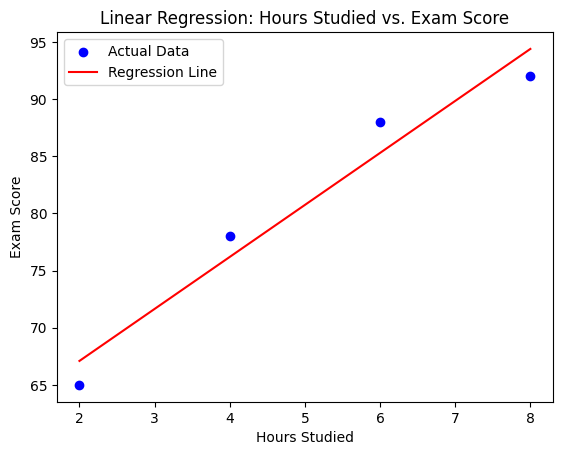

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Sample data
data = pd.DataFrame({'Hours Studied': [2, 4, 6, 8], 'Exam Score': [65, 78, 88, 92]})

# Model fitting
X = data[['Hours Studied']]
y = data['Exam Score']
model = LinearRegression().fit(X, y)

# Prediction
predicted_score = model.predict([[5]])[0]
print(f"Predicted score for 5 hours: {predicted_score}")

# Visualization
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, model.predict(X), color='red', label='Regression Line')
plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')
plt.title('Linear Regression: Hours Studied vs. Exam Score')
plt.legend()
plt.show()


Correlation coefficient: 1.0


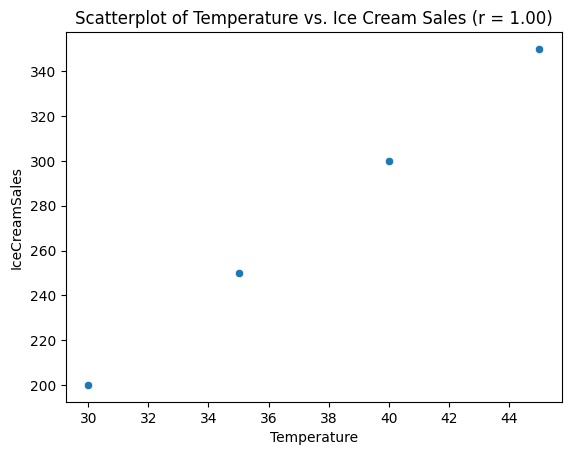

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data
data = pd.DataFrame({'Temperature': [30, 35, 40, 45], 'IceCreamSales': [200, 250, 300, 350]})

# Correlation calculation
correlation = data['Temperature'].corr(data['IceCreamSales'])
print(f"Correlation coefficient: {correlation}")

# Visualization
sns.scatterplot(x='Temperature', y='IceCreamSales', data=data)
plt.title(f'Scatterplot of Temperature vs. Ice Cream Sales (r = {correlation:.2f})')
plt.show()
